In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def generate_space(points,width):
    ls = []
    for x in range(0,points):
        a = [random.randrange(1,width+1),random.randrange(1,width+1)] #you need to make it so that it doesnt generate two on the same spot
        ls.append(a)
    return (np.array(ls))

In [13]:
def plot(coordinates):
    xs = []
    ys = []
    for x in coordinates:
        xs.append(x[0]) #doesnt really matter which you take as x and which you take as y
        ys.append(x[1])
    plt.scatter(xs,ys)
    for i,ğ in enumerate(coordinates):
        #plt.annotate(i,(xs[i],ys[i]))
        plt.annotate(f"{i} ({xs[i]},{ys[i]})",(xs[i],ys[i]))
    plt.gcf().set_size_inches(10, 10)
    plt.show()

In [14]:
def check(space,individual):
    total = 0
    
    for i,x1 in enumerate(individual):
        if i+1<len(individual):
            current = (space[x1])
            next_ = space[individual[i+1]]
            distance = np.linalg.norm((current-next_))
            total+=distance             
    
    return total

In [15]:
def generate_population(amount,points):
    population = np.arange(points)
    for individual in range(amount-1):
        a = np.arange(points)
        np.random.shuffle(a)
        population = np.vstack((population,a))
    return population

In [16]:
def generate_pc(cities,width,individuals):
    coordinates = generate_space(cities,width)
    population = generate_population(individuals,cities)
    return coordinates,population

In [17]:
def variation(population,conditions,optional=None):
    
    if conditions=="shuffle":
        mom = population[0]
        length = len(mom)
        crossover_point = np.random.randint(0,length-1)
        m_piece1 = mom[crossover_point:length]
        m_piece2 = mom[0:crossover_point]
        
        d_piece1=[]
        d_piece2=[]
        
        for x in m_piece2:
            d_piece2.append(x)
        for x in m_piece1:
            d_piece1.append(x)
        
        d_piece1=np.array(d_piece1)
        d_piece2=np.array(d_piece2)
        
        np.random.shuffle(d_piece1)
        np.random.shuffle(d_piece2)
        
        a = [np.concatenate((d_piece2,m_piece1)),np.concatenate((m_piece2,d_piece1))]
                    
        return a
    
    elif conditions=="ordercrossover":
        mom = population[0]
        dad = population[1]
        length = len(mom)
        m_piece1 = mom[np.random.randint(0,length-1):length]
        
        for x in m_piece1:
            index = np.where(m_piece1 == x)
            index2 = np.where(dad == x)
            dad[index2] = dad[index]
            dad[index] = x
    
        return [dad]
    
    

In [18]:
def train(population,space,iterations,operation):
    history = []
    for iteration in range(iterations):
        
        total_distances = np.zeros(len(population))
        dc = {}
        for i,individual in enumerate(population):
            total_distance = check(space,individual)
            total_distances[i] = total_distance
            dc[total_distance] = i
        total_distances.sort()        
        
        ls = []
        for x in (total_distances):
            ls.append(population[dc.get(x)])
        population = np.array(ls)
        
        a = variation(population,operation)
        
        for i,x in enumerate(a): 
            population[-(i+1)]=a[i]
                
        if iteration%100==0:
            lowest = total_distances[0]
            print(f"Iteration {iteration} lowest distance: {lowest}")
            history.append(lowest)
            
    print(f"Shortest path found: {population[0]}, distance: {lowest}")
    return history

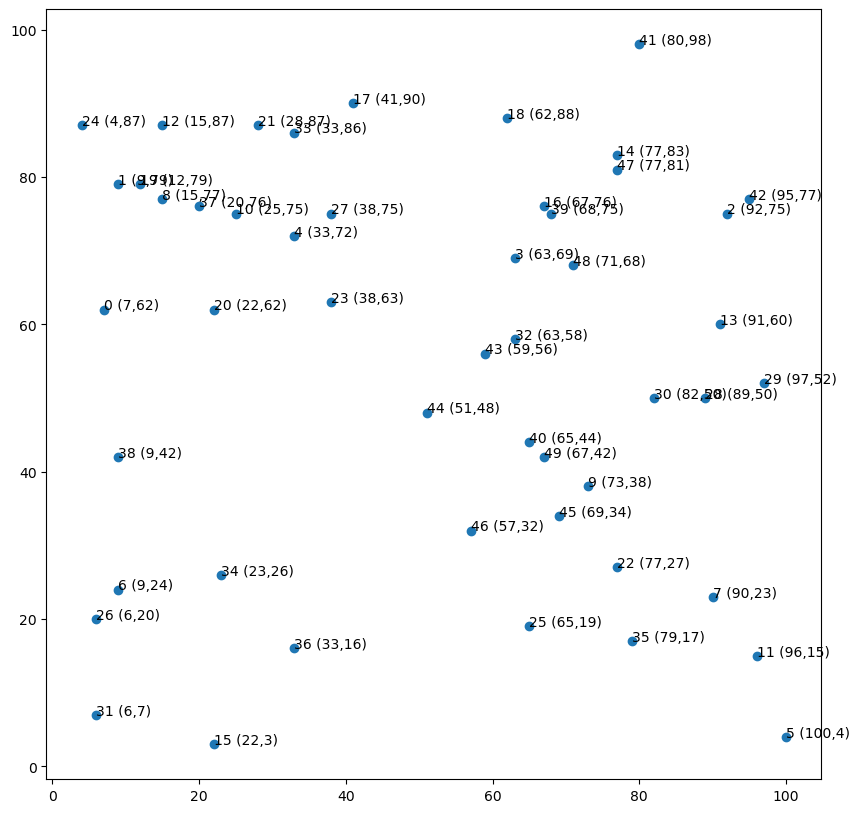

In [19]:
coordinates,population = generate_pc(50,100,10)
plot(coordinates)

Iteration 0 lowest distance: 2287.1826396427964
Iteration 100 lowest distance: 1971.0534614556066
Iteration 200 lowest distance: 1716.5511302810353
Iteration 300 lowest distance: 1499.2010983155392
Iteration 400 lowest distance: 1366.2280438636988
Iteration 500 lowest distance: 1351.3409140423942
Iteration 600 lowest distance: 1226.9928282603248
Iteration 700 lowest distance: 1127.548429720331
Iteration 800 lowest distance: 1127.548429720331
Iteration 900 lowest distance: 1097.0552517024153
Iteration 1000 lowest distance: 1051.681618327839
Iteration 1100 lowest distance: 972.5346621964168
Iteration 1200 lowest distance: 972.5346621964168
Iteration 1300 lowest distance: 972.5346621964168
Iteration 1400 lowest distance: 972.5346621964168
Iteration 1500 lowest distance: 972.5346621964168
Iteration 1600 lowest distance: 972.5346621964168
Iteration 1700 lowest distance: 972.5346621964168
Iteration 1800 lowest distance: 972.5346621964168
Iteration 1900 lowest distance: 972.5346621964168
Iter

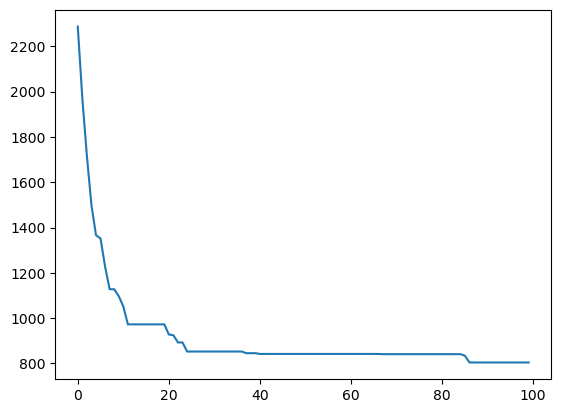

In [20]:
history = train(population,coordinates,10000,"ordercrossover")
plt.plot(history)

In [21]:
parents = np.array([[1,2,3,4,5,6,7,8,9,10],[10,9,8,7,6,5,4,3,2,1]])
mom = parents[0]
dad = parents[1]
length = len(mom)
print(dad)
m_piece1 = mom[np.random.randint(0,length-1):length]

for x in m_piece1:
    index = np.where(m_piece1 == x)
    index2 = np.where(dad == x)
    dad[index2] = dad[index]
    dad[index] = x

print(m_piece1)
print(dad)


[10  9  8  7  6  5  4  3  2  1]
[ 2  3  4  5  6  7  8  9 10]
[ 2  3  4  5  6  7  8  9 10  1]
